# MCM/ICM
---

>    Zepeng Li   /  Manding Wang   /   Fengming Zhu


---
## part1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 
print('---- reading ----')
data_frame = pd.read_excel('MCM_NFLIS_Data.xlsx', sheet_name='Data')
table = data_frame.values
print(table[0])
print('---------------')
shape = data_frame.shape
print('shape:', shape)

header = {'YYYY':0, 'State':1, 'COUNTY':2, 'FIPS_State':3, 'FIPS_County':4, 'FIPS_Combined':5,\
          'SubstanceName':6, 'DrugReports':7, 'TotalDrugReportsCounty':8, 'TotalDrugReportsState':9}

---- reading ----
[2010 'VA' 'ACCOMACK' 51 1 51001 'Propoxyphene' 1 84 41462]
---------------
shape: (24062, 10)


* *Note that:* the sum of **TotalDrugReportsCounty** in each state does not equal to the **TotalDrugReportsState**

In [2]:
below = 0
above = 0
already = []
count = 0
count_by_sheet = 0
for row in range(shape[0]):
    if table[row][header['YYYY']] != 2010:
        continue
#     print('FIPS_code: {}, DrugReports {}'.format(table[row][header['FIPS_Combined']], table[row][header['DrugReports']]))
#     if table[row][header['TotalDrugReportsCounty']] > 300:
#         above += 1
#     else:
#         below += 1
    if table[row][header['State']] == 'VA':
        count_by_sheet = table[row][header['TotalDrugReportsState']]
        if table[row][header['COUNTY']] not in already:
            count += table[row][header['TotalDrugReportsCounty']]
            already.append(table[row][header['COUNTY']])  
# print('below: ', below, 'above: ', above)
print('totalcount: ', count)
print('but totalcount given by sheet: ', count_by_sheet)


totalcount:  41368
but totalcount given by sheet:  41462


* Take 2010 as example, the data matrix would be:
    1. row $\rightarrow$ 'FIPS_Combined'
    2. col $\rightarrow$ 'DrugReports'/per substanceName

In [3]:
table_2010 = []
medicine_2010 = []
for row in range(shape[0]):
    if table[row][header['YYYY']] == 2010:
        table_2010.append(table[row].tolist())
        if table[row][header['SubstanceName']] not in medicine_2010:
            medicine_2010.append(table[row][header['SubstanceName']])
table_2010 = np.array(table_2010)
table_2010_cut = table_2010[:, 5:8]
medicine_2010 = np.array(medicine_2010)
print('--- table_2010_cut: ---')
print(table_2010_cut)
# print(table_2010_cut.shape)
print('---medicine_2010: ---')
print(medicine_2010)
print(medicine_2010.shape)

--- table_2010_cut: ---
[['51001' 'Propoxyphene' '1']
 ['39001' 'Morphine' '9']
 ['42001' 'Methadone' '2']
 ...
 ['51197' 'Hydrocodone' '60']
 ['51197' 'Hydromorphone' '1']
 ['51199' 'Oxycodone' '4']]
---medicine_2010: ---
['Propoxyphene' 'Morphine' 'Methadone' 'Heroin' 'Hydromorphone'
 'Oxycodone' 'Oxymorphone' 'Dextropropoxyphene' 'Buprenorphine'
 'Hydrocodone' 'Meperidine' 'Fentanyl' 'Dihydromorphone' 'Methorphan'
 'Codeine' 'Tramadol' 'Pethidine' 'Dihydrocodeine' 'Opiates' 'Opium'
 'Pentazocine' 'Alphaprodine' 'Acetylcodeine' 'Thebaine' 'Butorphanol']
(25,)


PCA continuing...

In [4]:
all_fips= []
for row in range(table_2010_cut.shape[0]):
    if table_2010_cut[row][0] not in all_fips:
        all_fips.append(table_2010_cut[row][0])
print(all_fips)

['51001', '39001', '42001', '51510', '42003', '21003', '51007', '51013', '42005', '39005', '39007', '39009', '39011', '54001', '21009', '21011', '42009', '51019', '21013', '54003', '42011', '51021', '21015', '54005', '21023', '54007', '21025', '21027', '39015', '51029', '42017', '21029', '39017', '42019', '54011', '54013', '42021', '42023', '42025', '51033', '21041', '39019', '21043', '21045', '51540', '51550', '42029', '51041', '21047', '42031', '42033', '39025', '39027', '51570', '42037', '39029', '39033', '42039', '21055', '39035', '51590', '42043', '21059', '39039', '39041', '42045', '51051', '54017', '39043', '42049', '51057', '51059', '21001', '51003', '51005', '39003', '51009', '51015', '51017', '42007', '39013', '21017', '21019', '21021', '51520', '51027', '51530', '21035', '21037', '51031', '51035', '42027', '39021', '21049', '51043', '21051', '21053', '42035', '39031', '51045', '51047', '21057', '51049', '39037', '51053', '21063', '51600', '39045', '21005', '51515', '42013', 

In [5]:
all_med = dict()
for row in range(table_2010_cut.shape[0]):
    if  table_2010_cut[row][1] not in all_med:
        all_med[table_2010_cut[row][1]] = np.array([0 for x in range(len(all_fips))])
print(all_med)


{'Propoxyphene': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
for row in range(table_2010_cut.shape[0]):
    fips = table_2010_cut[row][0]
    substance = table_2010_cut[row][1]
    num_reports = table_2010_cut[row][2]
    index = all_fips.index(fips)
#     print(fips, substance, num_reports, index)
    all_med[substance][index] = num_reports
print(all_med)

{'Propoxyphene': array([ 1,  0,  0,  0, 10,  0,  0,  0,  1,  0,  1,  1,  2,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  2,  3,  0,  0,  0,
        0,  0,  3,  0,  1,  0,  0,  1,  0,  0,  0,  2,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  0,  7,  0,  0,  0,  2,  4,  5,  0,  0,
        1,  1,  0,  0,  0,  0,  1,  2,  2,  1,  0,  1,  2,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  3,  0,  0,  1,  0,  0,  0,
        0,  2,  0,  2,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  1,  2,  0,  1,  2,  2,  1,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  1,  0,  0, 13,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  4,  2,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        

In [7]:
all_med_analysis = all_med.copy()
keys  = all_med.keys()
for key in keys:
    all_med_analysis[key] = dict()
# print(all_med_analysis)
for key in keys:
#     print(key)
#     print(all_med[key])
    all_med_analysis[key]['mean'] = np.around(np.mean(all_med[key]), decimals=3)
    all_med_analysis[key]['std'] = np.around(np.std(all_med[key]), decimals=3)
print(all_med_analysis)

{'Propoxyphene': {'mean': 0.611, 'std': 1.521}, 'Morphine': {'mean': 3.4, 'std': 6.158}, 'Methadone': {'mean': 3.867, 'std': 8.908}, 'Heroin': {'mean': 56.701, 'std': 259.595}, 'Hydromorphone': {'mean': 1.494, 'std': 4.477}, 'Oxycodone': {'mean': 43.061, 'std': 104.341}, 'Oxymorphone': {'mean': 0.773, 'std': 2.091}, 'Dextropropoxyphene': {'mean': 0.101, 'std': 0.562}, 'Buprenorphine': {'mean': 6.169, 'std': 17.493}, 'Hydrocodone': {'mean': 19.088, 'std': 39.941}, 'Meperidine': {'mean': 0.061, 'std': 0.346}, 'Fentanyl': {'mean': 0.402, 'std': 1.05}, 'Dihydromorphone': {'mean': 0.002, 'std': 0.047}, 'Methorphan': {'mean': 0.092, 'std': 0.656}, 'Codeine': {'mean': 1.465, 'std': 13.698}, 'Tramadol': {'mean': 0.91, 'std': 2.901}, 'Pethidine': {'mean': 0.016, 'std': 0.156}, 'Dihydrocodeine': {'mean': 0.007, 'std': 0.082}, 'Opiates': {'mean': 0.04, 'std': 0.673}, 'Opium': {'mean': 0.002, 'std': 0.047}, 'Pentazocine': {'mean': 0.02, 'std': 0.194}, 'Alphaprodine': {'mean': 0.002, 'std': 0.047},

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 
print('-----')

-----


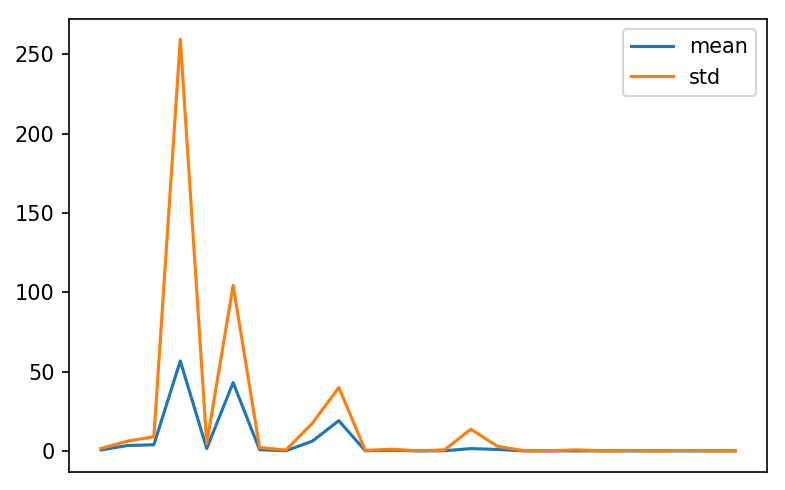

In [9]:
x = list(keys)
y_mean = [all_med_analysis[key]['mean'] for key in keys]
y_std = [all_med_analysis[key]['std'] for key in keys]
# print(x)
# print(y_mean)
# print(y_std)
plt.plot(x, y_mean, label='mean')
plt.plot(x, y_std, label='std')
plt.xticks([])
plt.legend()
plt.show()

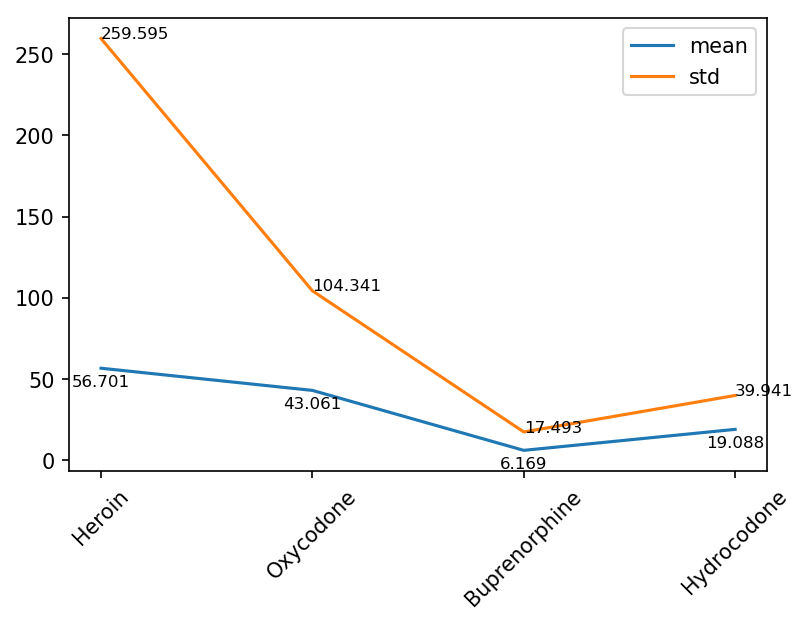

In [10]:

y_mean_thr = [all_med_analysis[key]['mean'] for key in keys if all_med_analysis[key]['mean'] > 5]
y_std_thr = [all_med_analysis[key]['std'] for key in keys if all_med_analysis[key]['mean'] in y_mean_thr]
x_thr = [key for key in keys if all_med_analysis[key]['mean'] in y_mean_thr]
for x,y in zip(x_thr, y_mean_thr):
    plt.text(x, y-13, str(y), ha='center', va='bottom', fontsize=8)
for x,y in zip(x_thr, y_std_thr):
    plt.text(x, y, str(y), fontsize=8)    
plt.plot(x_thr, y_mean_thr, label='mean')
plt.plot(x_thr, y_std_thr, label='std')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [11]:
# print(all_med)
all_med_2 = {'Heroin':[0 for x in range(len(all_fips))], 'Others':[0 for x in range(len(all_fips))]}
for key in all_med.keys():
    if key == 'Heroin':
        all_med_2['Heroin'] = all_med['Heroin']
    else:
        for i in range(len(all_fips)):
            all_med_2['Others'][i] += all_med[key][i]
all_med_2['Others'] = np.array(all_med_2['Others'])
print(all_med_2)

{'Heroin': array([   0,   50,   14,    5, 2592,    0,    1,   41,   96,   82,   26,
         72,   35,    0,    0,    0,   34,    3,    2,  146,  172,    0,
         47,    0,    1,    0,    4,    0,   14,    1,  618,    0,  223,
         49,   23,    0,   57,    1,   20,    5,    8,    0,    1,    0,
          3,  119,   95,   69,    0,   35,   29,  167,   68,   13,   29,
         34,   48,    6,    0,  462,    3,  266,    0,   24, 1123,  344,
          0,    0,   30,   62,    0,  102,    0,    4,    0,   43,    7,
          0,    0,   87,    0,    0,    5,    0,    0,    0,    0,    0,
         86,    0,    2,   23,   37,    0,    4,    0,    0,    8,    0,
         12,   18,    0,    2,   20,    0,    1,   20,  186,    0,    0,
        103,   20,   33,    0,   32,    2,    3,    0,    0,    0,    0,
         26,    0,    0,    4,    0,    3,   32,    0,   33,    0,    8,
         67,    1,    0,    1,   15,  327,   41,   11,   69,    0,    2,
          0,    8,    6,    1,   13,    

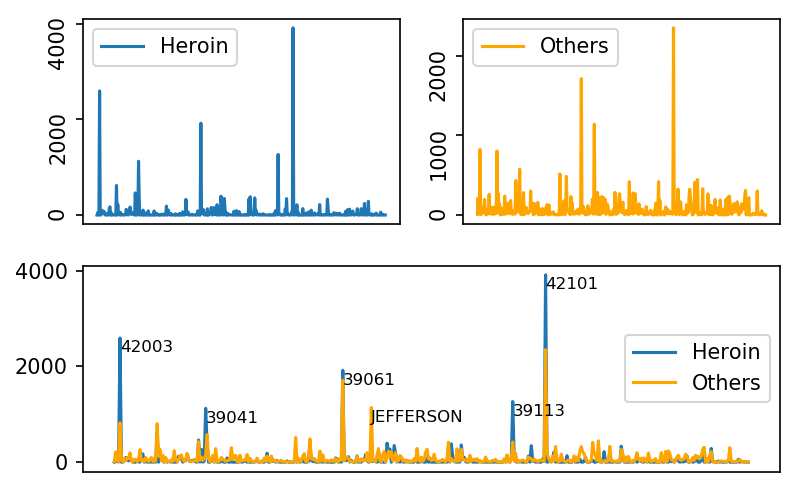

In [46]:
x_fips = [x for x in range(len(all_fips))]
y_heroin = all_med_2['Heroin']
y_others = all_med_2['Others']
# for x,y in zip(x_fips, y_heroin):
#     if y > 1000:
#         plt.text(x, y-13, all_fips[x], ha='center', va='bottom', fontsize=8)
# for x,y in zip(x_fips, y_others):
#     if y > 500:
#         plt.text(x, y, all_fips[x], fontsize=8)

plt.subplot(221)
plt.plot(x_fips, y_heroin, label='Heroin')
plt.xticks([])
plt.yticks(rotation=90)
plt.legend()

plt.subplot(222)
plt.plot(x_fips, y_others, label='Others', color='orange')
plt.xticks([])
plt.yticks(rotation=90)
plt.legend()

plt.subplot(212)
plt.plot(x_fips, y_heroin, label='Heroin')
plt.plot(x_fips, y_others, label='Others', color='orange')
for x,y in zip(x_fips, y_heroin):
    if y > 1000:
        county = ''
        for row in range(shape[0]):
            if table[row][header['FIPS_Combined']] == eval(all_fips[x]):
                FIPS_Combined = table[row][header['FIPS_Combined']]
        plt.text(x, y-300, FIPS_Combined, fontsize=8)
for x,y in zip(x_fips, y_others):
    if all_fips[x] == '21111':
        county = ''
        for row in range(shape[0]):
            if table[row][header['FIPS_Combined']] == 21111:
                county = table[row][header['COUNTY']]
        plt.text(x, y-300, county, fontsize=8)    
plt.xticks([])
plt.legend(loc=7)
plt.savefig('counties_2010.jpeg', dpi=300)
plt.show()


* approximatoin solutions try...

In [13]:
N = 5000
A = np.mat([[(1-629.0/N)*629, 629.0],\
            [(1-899.0/N)*899, 899.0],\
            [(1-2320.0/N)*2320, 2320.0],\
            [(1-4175.0/N)*4175, 4175.0],\
            [(1-4367.0/N)*4367, 4367.0],\
            [(1-4045.0/N)*4045, 4045.0],\
            [(1-3716.0/N)*3716, 3716.0]])
b = np.mat([[270.0], [1421.0], [1855.0], [187.0], [-317.0], [-329.0], [-485.0]])
x = (A.T.dot(A)).I.dot(A.T.dot(b))
print('lamba: ', float(x[0]))
print('mu: ', float(x[1]))

lamba:  1.8450112655050859
mu:  -0.3718222189390825


In [43]:
states = ['KY', 'OH', 'PA', 'WV', 'VA']

# Lambda = [[0 for x in range(5)] for x in range(5)]
Lambda = np.zeros([5,5])
# Mu = [0 for x in range(5)]
Mu = np.zeros(5)
# N = [0 for x in range(5)]
N = np.zeros(5)

heroin_table = pd.read_excel('part1_states.xlsx', sheet_name='heroin').values[1:]
heroin_delta_table = pd.read_excel('part1_states.xlsx', sheet_name='heroin_delta').values[1:]
others_table = pd.read_excel('part1_states.xlsx', sheet_name='others').values[1:]
others_delta_table = pd.read_excel('part1_states.xlsx', sheet_name='others_delta').values[1:]
table_header = pd.read_excel('part1_states.xlsx', sheet_name='heroin').values[0]

print(table_header)
print(heroin_table)
print(heroin_delta_table)
# print(others_table)
# print(others_delta_table)

# heroin_table = others_table
# heroin_delta_table = others_delta_table

N_heroin = [5000, 25000, 21000, 2100, 5000]
N_others = [10000, 33000, 16000, 2500, 7500]
N = N_heroin

['Ky' 'oh' 'pa' 'wv' 'va']
[[629 9301 12102 902 2298]
 [899 11004 11741 949 1193]
 [2320 14633 13086 1175 1709]
 [4175 18340 14745 1857 4396]
 [4362 20590 18454 1516 3132]
 [4045 23347 18964 1135 3583]
 [3716 20877 17559 1168 4261]
 [3231 15045 13256 751 3869]]
[[270 1703 -361 47 -1105]
 [1421 3629 1345 226 516]
 [1855 3707 1659 682 2687]
 [187 2250 3709 -341 -1264]
 [-317 2757 510 -381 451]
 [-329 -2470 -1405 33 678]
 [-485 -5832 -4303 -417 -392]]


In [146]:
# N table
N_table = [[0 for j in range(5)] for i in range(8)]
for i in range(8): 
    for j in range(5):
        N_table[i][j] = (N[j] - heroin_table[i][j])/N[j]
N_table = np.mat(N_table)
print(N)
print(N_table)

for city_index in range(table_header.shape[0]):
    A = np.mat(np.zeros([6,6]))
    for i in range(5):
        A[:,i] = np.multiply(np.mat(heroin_table[:6,i]).T, N_table[:6,city_index])
    A[:,5] = np.mat(heroin_table[:6,city_index]).T
#     print(A)
    b = np.mat(heroin_delta_table[:6,city_index]).T
#     print(b)
    x = (A.T.dot(A)).I.dot(A.T.dot(b))
#     print(x)
    for lam in range(5):
        Lambda[lam][city_index] = float(x[lam])
    Mu[city_index] = float(x[5])
print('---- the last b ----')
print(b)
print('---- the last Error ----')
print(b-A*x)
print('---- Lambda ----')
print(Lambda)
print('----- Mu -----')
print(Mu)

[5000, 25000, 21000, 2100, 5000]
[[0.8742     0.62796    0.42371429 0.57047619 0.5404    ]
 [0.8202     0.55984    0.44090476 0.54809524 0.7614    ]
 [0.536      0.41468    0.37685714 0.44047619 0.6582    ]
 [0.165      0.2664     0.29785714 0.11571429 0.1208    ]
 [0.1276     0.1764     0.1212381  0.27809524 0.3736    ]
 [0.191      0.06612    0.09695238 0.45952381 0.2834    ]
 [0.2568     0.16492    0.16385714 0.44380952 0.1478    ]
 [0.3538     0.3982     0.3687619  0.64238095 0.2262    ]]
---- the last b ----
[[-1105]
 [516]
 [2687]
 [-1264]
 [451]
 [678]]
---- the last Error ----
[[-9.254108590539545e-11]
 [-5.843503458891064e-11]
 [-1.509761204943061e-10]
 [-2.1373125491663814e-11]
 [9.549694368615746e-12]
 [-9.731593308970332e-11]]
---- Lambda ----
[[  1.79968607  17.42781846   2.02375417  -1.27185378  -2.06911824]
 [ -0.07564616  -8.56886881  -1.73083936   0.76030723   2.07095745]
 [ -0.182129     5.64390756  -0.5783884   -1.3878089   -2.37129334]
 [  4.6004104   36.53582023  3

------ Before ------
[[  1.665       17.42781846   2.02375417  -1.27185378  -2.06911824]
 [ -0.07564616  -8.5507      -1.73083936   0.76030723   2.07095745]
 [ -0.182129     5.64390756  -0.601       -1.3878089   -2.37129334]
 [  4.6004104   36.53582023  32.85819362  10.15         5.35654386]
 [ -0.80831527 -12.77998438  -4.17511182   1.31346419   2.548     ]]
------ After ------
[[  1.665       17.42781846   2.02375417  -1.27185378  -2.06911824]
 [ -0.07564616  -8.5507      -1.73083936   0.76030723   2.07095745]
 [ -0.182129     5.64390756  -0.601       -1.3878089   -2.37129334]
 [  4.6004104   36.53582023  32.85819362  10.15         5.35654386]
 [ -0.80831527 -12.77998438  -4.17511182   1.31346419   2.548     ]]


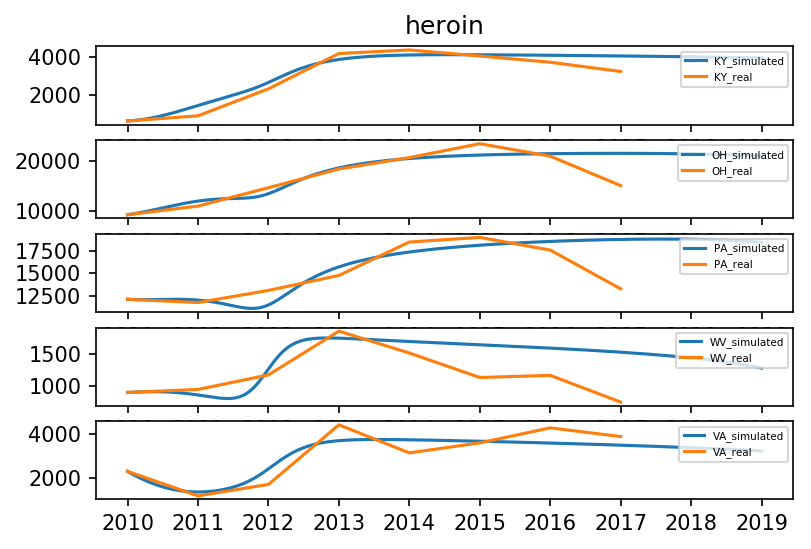

In [184]:
print('------ Before ------')
print(Lambda)
Lambda[0][0] = 1.665
Lambda[1][1] = -8.5507
Lambda[2][2] = -0.601
Lambda[3][3] = 10.15
Lambda[4][4] = 2.548
print('------ After ------')
print(Lambda)
from scipy.integrate import odeint
def equations(y, t, Lambda, Mu):
#     Lambda, Mu = args
    ret = np.zeros(5)
    for col in range(5):
        for row in range(5):
            ret[col] += Lambda[row][col]*y[row]*(1-y[col])*N[row]/N[col]
        ret[col] += Mu[col]*y[col]
    return ret
y0 = [heroin_table[0][i]/float(N[i]) for i in range(5)]
# print(y0)
t = np.linspace(0,9,10001)
sol = odeint(equations, y0, t, args=(Lambda,Mu))
# print(sol)
# print(heroin_table)
# print(N)

for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(t, sol[:,i]*N[i], label=(table_header[i].upper()+'_simulated'))
    plt.plot([j for j in range(8)], [heroin_table[j,i] for j in range(8)], label=(table_header[i].upper()+'_real'))
#     plt.yticks([x for x in range(10000)])
    plt.xticks([x for x in range(10)], [str(i) for i in range(2010,2020)])
    plt.legend(loc=1, fontsize=5)
    if i == 0:
        plt.title('heroin')
plt.savefig('heroin_states_simul_modified.png', dpi=300)

---
## part2